                    Compiled By Alem Fitwi
                    January, 2022

# 1. Introduction
- Why do we need software testing?
    1. To detect bugs
        - Debugging: Not being the detective in a crime movie where you are also the murder
    2. Customers depend on us
        - Happy Cutomers $\rightarrow$ Good Sales $\rightarrow$ profit
        - Make your software clean
    3. Reduce cost of maintenance
        - Earlier fixes reduce costs and time
        - Cost of fix grows polynomially from requirement and initial coding, unit testing, integration testing, system testing, through maintenance.
    4. Helps Focus on doing the business, not fixing things. 
- SW Development Cycle
    - Requirement Analysis $\rightarrow$ QA $\rightarrow$ Production

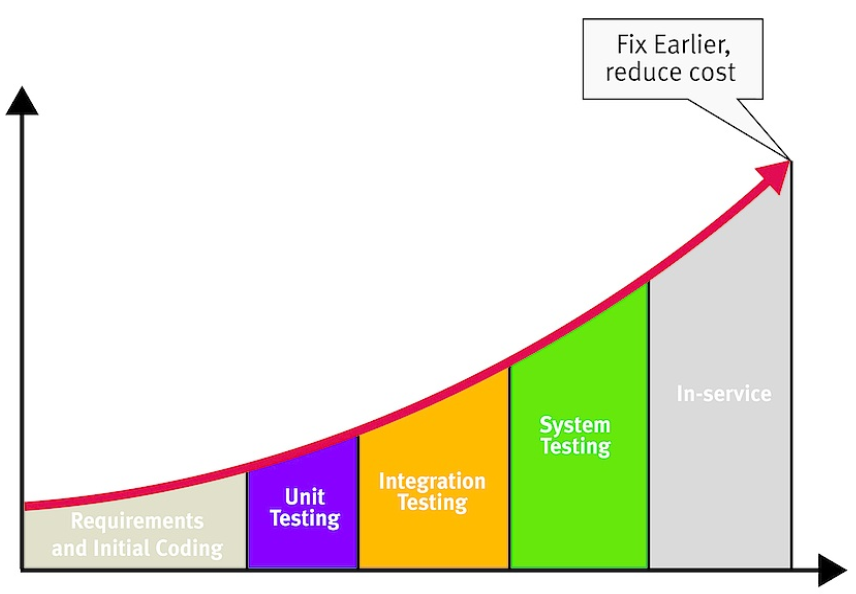

In [24]:
from IPython.display import Image
Image('cost.png')

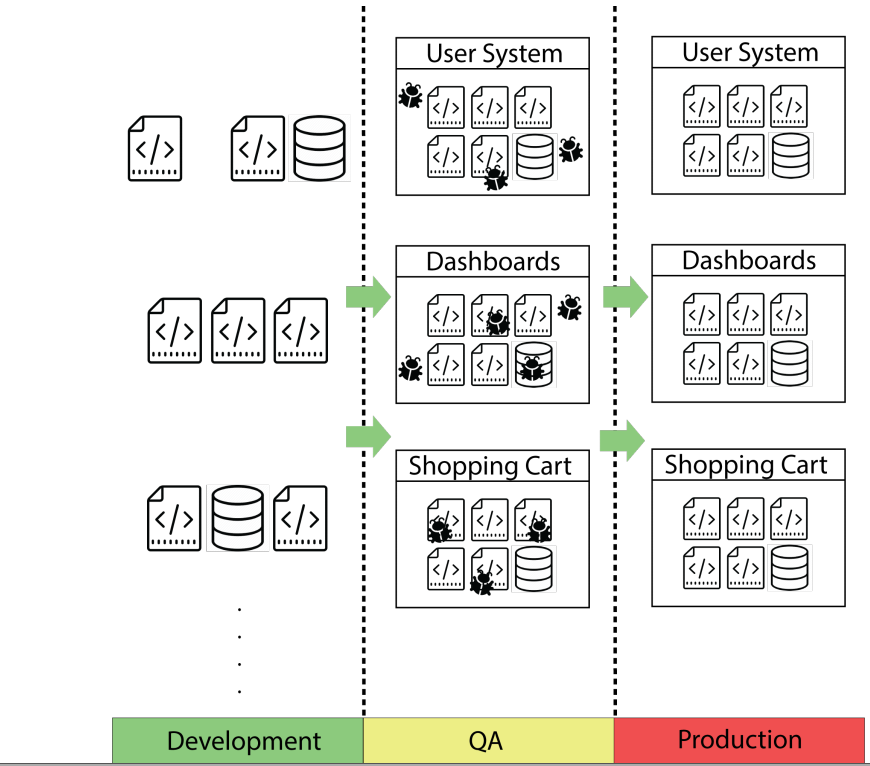

In [26]:
Image('dc.png')

# 2. Unit Testing
- Sits in the dvelopment stage of the SW cycle
- Smallest testable parts of an application
    - Individual Function
    - Individual Module
- Usually carried out in the development stage
- It is a **White Box** Testing
    - Clear-boc testing
    - Tester knows the internal details of function to be tested.
        - Data Structures
        - Algorithms
        - Corner Cases
- Importance of Unit Testing
    - Ensures every SMALL component of the SW is correct and well tested
    - Capture bugs in EARLY stage; i.e, development stage.
- Unit Testing Example

In [1]:
def add(x,y):
    return x+y

def subtract(x,y):
    return x-y

def multiply(x,y):
    return x*y

def divide(x,y):
    

In [ ]:
import os
import pytest
import unittest

class TestPyOperators(unittest.TestCase):
    def test_add(self):
        self.assertEqual(add(0.2, 1.4), 1.6)
        
    def test_subtract(self):
         self.assertEqual(subtract(0.2, 1.4), 1.2)
    
    def test_multipy(self):
         self.assertEqual(multiply(0.2, 1.4), 0.28)
    
    def test_divide(self):
         self.assertEqual(divide(1.4, 0.2), 7.0)
    
    
if __name__ == '__main__':
    unittest.main()             

In [5]:
0.2+1.4

1.5999999999999999

In [6]:
pytest.approx(0.2+1.4)

1.5999999999999999 ± 1.6e-06

In [22]:
pytest.approx(0.2+1.4) == 1.6

True

In [8]:
import math
math.isclose(0.2+1.4, 1.6)

True

In [13]:
math.isclose(0.2*1.4, 0.28)

True

In [10]:
math.isclose(1.4/0.2, 7.0)

True

In [11]:
math.isclose(1.4-0.2, 1.2)

True

In [20]:
def round_val(val, target):
    dplaces = str(target).split('.')
    {True: 0, False:len(dplaces[1])}[len(dplaces[0])<=1]
    return round(val, len(dplaces[1]))

In [21]:
round_val(0.2+1.4, 1.6) == 1.6

True

**Demo**
- 3 Functions to be tested
- Edge/Corner Cases
- Breaking Unit Tests

In [23]:
def increment(number):
    return number + 1

def decrement(number):
    return number - 1

def is_a_big_number(number):
    if number >= 100:
        return True
    else:
        return False

def test_increment():
    assert increment(1) == 2
    assert increment(-4) == -3
    assert increment(0) == 1

def test_decrement():
    assert decrement(1) == 0
    assert decrement(-4) == -5
    assert decrement(0) == -1

def test_big_number():
    assert is_a_big_number(100) == True
    assert is_a_big_number(99.9) == False

# 3. Integration Test
- A development Test that focuses on a group of functions or modules put together.
- It tests interface between units
    - Source Code
    - Database connection
- Usually carried out in development stage after unit testing
- It is a white box testing too.
- Importance:
    - Comfirms features are woring as expected when numbers of tested units/modules combine together.
    - Capture bugs in EARLY stage; development stage.
- Challenges:
    - Tests are harder to write
        - More code involved, bugger scale
        - Units crossing different teams
            - Dependency problems
    - Tests are harder to manage
        - Changing requirements usually requires changing integration test code.
            - Hard To chase back where to update.     
- Demo:
    - Adding the data to DB through js
        - Make sure it doesn't exist first
    - Confirming the data is properly saved to DB
    - Components:
        - Source code (js)
        - DB(mongoDB)
        
                    const MongoClient = require('mongodb').MongoClient;
                    const assert = require('assert');

                    // Connection URL
                    const url = 'mongodb://localhost:27017';

                    // Database Name
                    const dbName = 'test';

                    function addBooking(name, callback) {

                      // Connect to MongoDB
                      MongoClient.connect(url, function(err, client) {
                        console.log("Connected successfully to server");
                        const db = client.db(dbName);

                        // Get into the "bookings" collection
                        const collection = db.collection("bookings");

                        // Insert the booking record
                        collection.insert({ name: name }, function(err, doc) {
                          console.log("Inserted record ", name);
                          console.log(doc);
                          client.close();

                          // Callback to notify insert finished
                          if (callback) {
                            callback(doc);
                          }
                        });
                      });
                    }

                    module.exports = addBooking;
                    
                    
                    
                    const MongoClient = require('mongodb').MongoClient;
                    const assert = require('assert');
                    const addBooking = require('./index.js');

                    // Connection URL
                    const url = 'mongodb://localhost:27017';

                    // Database Name
                    const dbName = 'test';

                    // Generate a random booking name
                    const randomNumber = Math.random() * 1000;
                    const bookingName = "Booking " + randomNumber;

                    console.log('Inserting booking with name "' + bookingName + '"');

                    // Add a booking
                    addBooking(bookingName, function(doc) {

                      // After adding record to DB and check if the booking exists
                      MongoClient.connect(url, function(err, client) {
                        console.log("Connected successfully to server");
                        const db = client.db(dbName);

                        // Get into the "bookings" collection
                        const collection = db.collection("bookings");

                        // Find booking with the random name generated above
                        collection.find({ name: bookingName }).toArray(function(err, docs) {
                          console.log("Found the following records ", docs);
                          assert.equal(docs.length, 1);
                          assert.equal(docs[0].name, bookingName);
                          client.close();
                        });
                      });
                    });




# 4. Smoke and Sanity Test
- Carried out right after the development stage and right before the QA stage.
- FAST	and	SIMPLE	tests	after	software	build	
    - Reject	bad	builds	EARLIER	
    - Save	testers	time	and	overheads	
- A	subset	of	Tester	Acceptance	Tests	
- Usually	automated	
    - No	testers	involved	to	safe	human	resource	for	thorough	tests	that	required	dedicated	power	
- Smoke Test:
    - checks if critical functions are still working
    - verify stability before rigorous testing
    - tests cover most components
    - General health checkup
- Snaity Test:
    - checks new functions or bugs that have been fixed
    - verify rationality before more rigorous testing
    - Test covers new components or problematic components
    - Specialized health checkup

# 5. E2E Testing
- A detailed testing
- Conducted	from	the	point	of	view	of	END-USER	
    - User	interface	testing	
- Check	if	the	software	meets	design	requirements	
- Usually	carried	out	in	QA	stage	
- Black-box	testing	(no need to know the details)
    - You only know the input and out of the software

**End-to-end	testing	of	Gmail**	
1.  Launching	Gmail	login	page	
2.  Logging	into	Gmail	account	
3.  Accessing	inbox	
4.  Composing	new	email	and	sending	it	
5.  Opening	sent	item	and	verifying	it	was	sent	
6.  Logging	out	Gmail	account	

- It is a design requirement

# 6. Performance Testing
- Nonfunctional testing
- At production stage
- With small requests, it might work well; but with many requests in production stage, it might be overwhelmed.
- Use artillery for testing your server

# 7. User Acceptance Testing
- Carried out at production stage.
- A	process	of	verifying	solution	works	for	user	
    - Is	it	solving	the	problem?	
    - Do	they	have	trouble	using	it?	
- The	last	phase	of	software	development	
- Real	users	giving	feedback	on	the	solution	

**User	acceptance	testing**
1. Interviewing	a	real	user	
2. Questionnaire	survey	
3. Analytics	tools	

**Handling	UAT	feedback**	
- Bugs	
    1.  Highest	priority	
    2.  Any	improvements	in	testing	process?	
- Change	requests	
    1.  Any	additional	cost	and	time	is	needed?	
    2.  Are	the	changes	benefit	to	user?
- New	features	
    1.  Are	the	features benefit to	users in general and align	to	the	company/software goal?	

                            ~END~